In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
class CountingProcess:
    def __init__(self, T, process_name="Counting process"):
        self.T = T
        self.name = process_name
        self.events = self.generate_events()
        self.N = len(self.events)

    def generate_events(self):
        pass

    def _generate_intensity(self, res=1000):
        pass

    def _events_with_limits(self):
        return [0] + self.events + [self.T]

    def plot_process(self, width=10, height=6):
        plt.figure(figsize=(width, height))
        plt.step(self._events_with_limits(), list(range(self.N+1))+[self.N], where="post")
        plt.vlines(self.events, *plt.gca().get_ylim(), color="red", linestyle="--", linewidth=0.5)
        plt.title("Hawkes process")
        plt.xlim(0, self.T)
        plt.grid()
        plt.show()

    def plot_intensity(self, width=10, height=6):
        plt.figure(figsize=(width, height))
        absintens, intens = self._generate_intensity()
        plt.plot(absintens, intens)
        plt.vlines(self.events, *plt.gca().get_ylim(), color="red", linestyle="--", linewidth=0.5)
        plt.title(self.name + " intensity")
        plt.xlim(0, self.T)
        plt.grid()
        plt.show()

    def plot_process_and_intensity(self, width=10, height=8):
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(width, height))
        ax1.step(self._events_with_limits(), list(range(self.N+1))+[self.N], where="post")
        ax1.vlines(self.events, *ax1.get_ylim(), color="red", linestyle="--", linewidth=0.5)
        ax1.set_xlim(0, self.T)
        ax1.grid()
        ax1.set_title(self.name)
        ax1.set_xlabel("Time")
        ax1.set_ylabel("$N(t)$")
        absintens, intens = self._generate_intensity()
        ax2.plot(absintens, intens)
        ax2.vlines(self.events, *ax2.get_ylim(), color="red", linestyle="--", linewidth=0.5)
        ax2.set_xlim(0, self.T)
        ax2.grid()
        ax2.set_title(self.name + " intensity")
        ax2.set_xlabel("Time")
        ax2.set_ylabel("$\lambda(t)$")
        fig.tight_layout()
        plt.show()

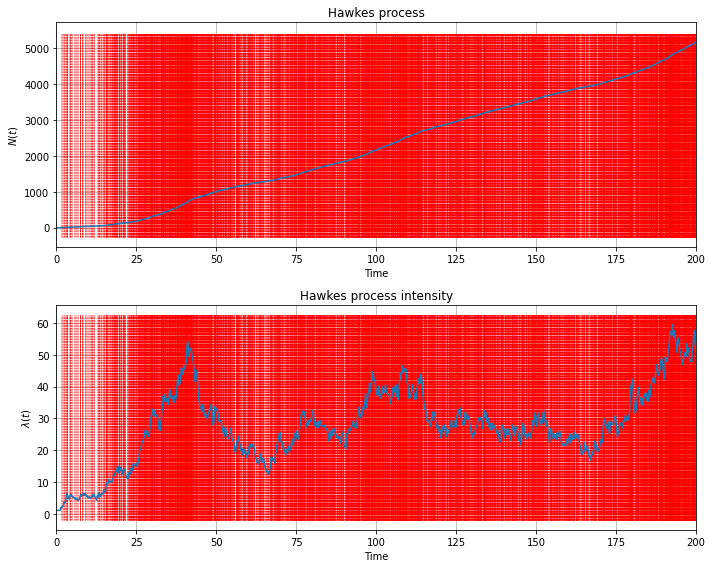

In [30]:
class HawkesProcess(CountingProcess):
    def __init__(self, mu, alpha, beta, T, name="Hawkes process"):
        if alpha <  0 or beta < alpha:
            raise ValueError(f"We must have 0 < alpha < beta (alpha={alpha} and beta={beta})")
        self.mu = mu
        self.alpha = alpha
        self.beta = beta
        super().__init__(T, name)

    def lamb(self, t, tau):
        return self.mu + sum([self.alpha * np.exp(-self.beta*(t-tk)) for tk in tau])

    def generate_events(self):
        Tau = []
        s = n = 0
        while s < self.T:
            lambda_bar = self.lamb(s, Tau)
            u = np.random.uniform(0,1)
            w = -np.log(u)/lambda_bar
            s += w
            D = np.random.uniform(0,1)
            if D*lambda_bar <= self.lamb(s, Tau):
                n += 1
                t = s
                Tau.append(t)
        if t <= self.T:
            return Tau
        else:
            return Tau[:-1]

    def _generate_intensity(self, res=1000):
        x = np.linspace(0, self.T, res)
        intensity = self.mu * np.ones(res)
        points0 = self._events_with_limits()
        for i in range(len(points0)-1):
            p1, p2 = points0[i:i+2]
            i1 = (np.abs(x - p1)).argmin()
            i2 = (np.abs(x - p2)).argmin()
            if i == 0:
                intensity[i1:i2+1] = self.mu
            else:
                local_intensity = np.array([self.lamb(x[ii], points0[:i+1]) for ii in range(i1, i2+1)])
                intensity[i1:i2+1] = local_intensity
        return x, intensity

h = HawkesProcess(1.2, 0.6, .61, 200)
h.plot_process_and_intensity()

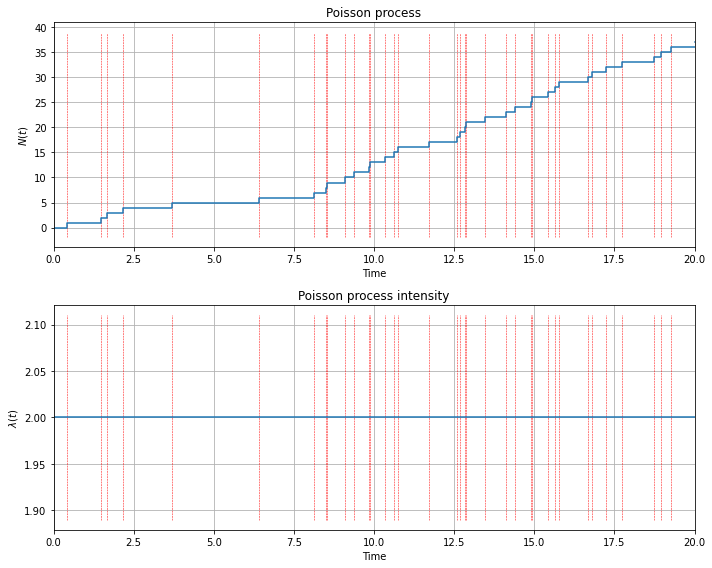

In [21]:
class PoissonProcess(CountingProcess):
    def __init__(self, lamb, T, name="Poisson process"):
        if lamb <= 0:
            raise ValueError(f"lambda must be strictly positive (lambda={lamb})")
        self.lamb = lamb
        super().__init__(T, name)

    def generate_events(self):
        Tau = []
        s = n = 0
        while s < self.T:
            u = np.random.uniform(0,1)
            w = -np.log(u)/self.lamb
            s += w
            Tau.append(s)
        return Tau

    def _generate_intensity(self):
        x = [0, self.T]
        intensity = [self.lamb, self.lamb]
        return x, intensity

p = PoissonProcess(2, 20)
p.plot_process_and_intensity()